# R for Visualization and Exploration of Data


This notebook contains an introduction to the methods data scientists use to explore a data set. Data scientists spend a lot of time working to undertand the relationships in and data set (**data exporation**).

In these lessons we will be working with a data set containing the prices and characteristics of a number of automobiles. The ultimate goal is to build a model for predicting the price of a car from its characteristics. However, in this lesson we will focus on data exploration using visualization techniques. 

These lessons are divided into several parts. In each part you will learn how to use the visualization tools availble in R.

- **Overview of ggplot2** the package we will use extensively in this course for plotting. 
- **Overview of plot types** is a reivew of creating basic plot types used to construct visualizations.
- **Using Aesthetics** is an overview of how to project additional plot dimensions using plot aesthetics.
- **Facetted plotting** also know as conditioned plotting or lattice plotting introduces a powerful method for visualizing higher dimensional data. 

## About the data set

This data set is from the [Univeristy of California Irving Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Automobile)  The data was compiled by Jeffrey C. Schlimmer from the following sources:

- 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 
- Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 
- Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037


## Exploration and Visualization of Data

### Why visualization?

Visualization is an essential method in any data scientistâs toolbox. Visualization is a key first step in the exploration of most data sets. As a general rule, you should never start creating models until you have examined the data and understand the relationships. Otherwise, you risk wasting your time creating models blindly. Visualization is also a powerful tool for presentation of results and for determining sources of problems with analytics. 

The concepts of exploring a data set visually were pioneered by John Tukey in the 1960s and 1970s. Tukey consolidated his many ideas on data exploration into a book in the late 1970s, ***John Tukey, Exploratory Data Analysis, 1977, Addison-Westley***.

Bill Cleveland documented his seminal work in visualization of complex data sets in his book, ***William S. Cleveland, Visualizing Data, 1993, Hobart Press***.

The key concept of exploratory data analysis (EDA) or visual exploration of data is to understand the relationships in the data set. Specifically using visualization when you approach a new data set you can:

- Explore complex data sets, using visualization to develop understanding of the inherent relationships.
- Use different chart types to create multiple views of data to highlight different aspects of the inherent relationships.
- Use plot aesthetics to project multiple dimensions. 
- Apply conditioning or faceting methods to project multiple dimensions




### Basic chart types

Now that we have loaded and had a first look at the data, let's get to work making some charts. 

There are enumerable chart types that are used for data exploration. In this tutorial we focus on the most used chart types:

- **Bar plots**
- **Histograms**
- **Box plots**
- **Kernel Density Estimation Plots**
- **Violin plots**
- **Scatter plot**
- **2d Kernel Density Plots**
- **Line plots**



### Why ggplot2?

The R ggplot2 package is a powerful visualizatiton and presentation graphics package. With ggplot2 you cana explore complex relationships in a data set. Furthermore, you can use ggplot2 to for creating presentation graphics for your coleagues, your boss and your instructor. 

## Load and examine the data set

The code in the cell below loads the data set from AML. The function performs some minimal clean up on the data. Rows with missing values are dropped and some columns are converted from strings containing numbers to numeric type. 

Execute the code in this cell to load the data into your notebook. 

In [51]:
library("AzureML")
ws <- workspace()
auto.price <- download.datasets(ws, "Automobile price data (Raw)")

clean.auto = function(auto.price){
  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)

  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  auto.price[complete.cases(auto.price), ]
}
auto.price = clean.auto(auto.price)

Warning message:
In lapply(auto.price[, numcols], as.numeric): NAs introduced by coercionWarning message:
In lapply(auto.price[, numcols], as.numeric): NAs introduced by coercionWarning message:
In lapply(auto.price[, numcols], as.numeric): NAs introduced by coercionWarning message:
In lapply(auto.price[, numcols], as.numeric): NAs introduced by coercionWarning message:
In lapply(auto.price[, numcols], as.numeric): NAs introduced by coercion

Notice that there are some missing values in the numberic columns. These are removed using the `complete.cases` function which returns a logical `TRUE` for rows without missing data.

Next, lets have a first look at a summary of the columns in this data set:

In [52]:
str(auto.price)

'data.frame':	195 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.o

Some key things to notice here are:

- There are 195 rows or cases in the data set.
- The data set has 26 variables or columns.
- Columns have a type of either chr (character), num (numeric or floating point number), or int (integer). 


### Bar plots

Bar plots are used to display the counts or fequency of unique values of a categorical variable. The height of the bar represents the count for each unique category of the variable. 

The code below uses ggplot2 to create the bar plot. The `ggplot` function defines the data frame and the column(s) to be plotted. The plot type is defined by these function `geom_bar`. The `+` operator chains the functions. 

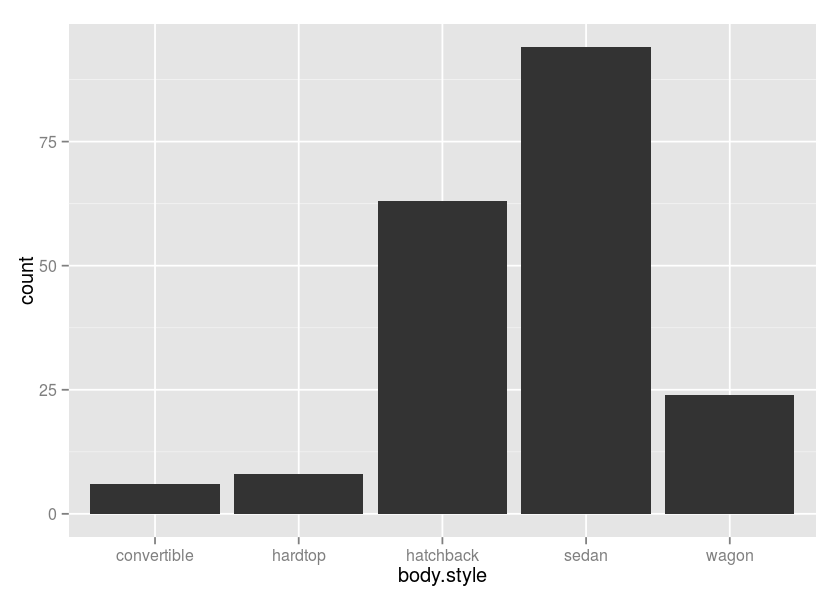

In [53]:
require(ggplot2)
require(repr)
options(repr.plot.width=7, repr.plot.height=5)
ggplot(auto.price, aes(body.style)) + geom_bar()

From this display you can see that sedan is the most freauent body type and convertible the list fequent. 

It would be easier to understand this plot if the frequencies of the categories were ordered. Further, if there are a large number of categories rotating the text would help quite a bit. The code in the cell below does both of these operations. Notice that an additional chaining operator, `+`, is used to add the additional text theme attribute. Execute this code.

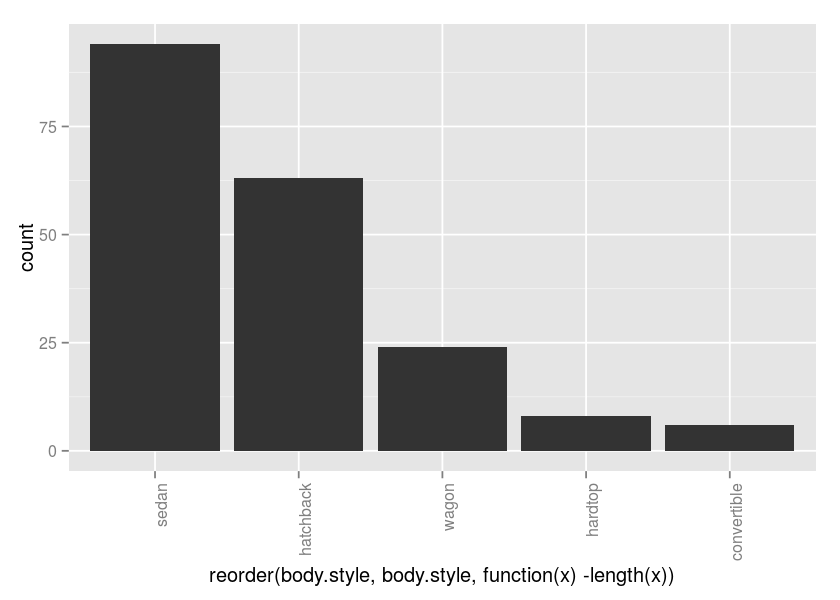

In [54]:
ggplot(auto.price, aes(x=reorder(body.style,body.style, function(x)-length(x)))) + 
                         geom_bar() + 
                         theme(axis.text.x = element_text(angle = 90, hjust = 1))

### Histograms

Histograms are related to bar plots. Histograms are used for numeric variables. Whereas, a bar plot shows the counts of unique categories, a histogram shows the number of data with values within a bin. The bins divide the values of the variable into equal segments. The vertical axis of the histogram shows the count of data values within each bin.  

Execute the code in the cell below which uses the `geom_histogram` function to plot the historgram. 

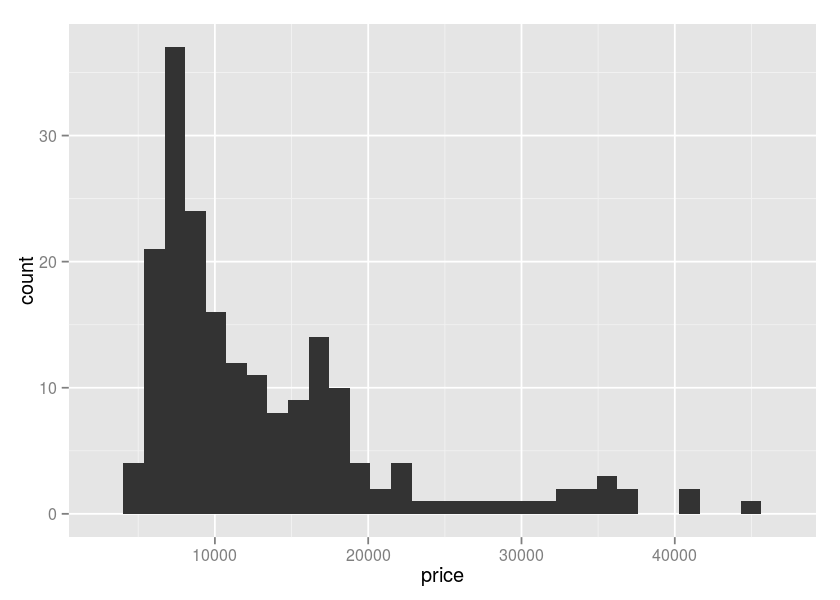

In [55]:
ggplot(auto.price, aes(price)) + geom_histogram()

The histogram shows that the price of automobies are skewed toward the lower end, with only a few high priced autos.

### Box plots

Box plots, also known as box and wisker plots, were introduced by John Tukey in 1970. Box plots are another way to visualize the distribution of data values. In this respect, box plots are comparable to histograms, but are quite different in presentation. 

On a box plot the median value is shown with a dark bar. The inner two qartiles of data values are contained within the 'box'. The 'wiskers' enclose the majority of the data. Outliers are shown by symbols byond the wiskers.

Several box plots can be stacked along an axis. The data are divided using a 'group by' operation, and the box plots for each group are stacked next to each other. In this way, the box plot allows you to display two dimensions of your data set. 

The basic code to create a box plot is shown in the cell below. Execute this code.

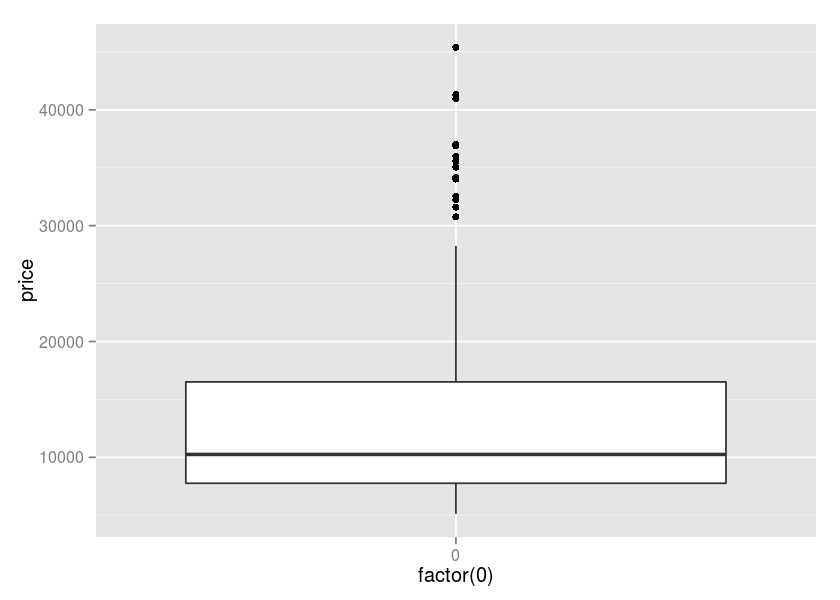

In [56]:
ggplot(auto.price, aes(x = factor(0), y = price)) + geom_boxplot()

Box plots are most useful when the data are subdivided using another variable. In ggolot2 the you can add an x variable of type factor to perform this group by operation. Execute the code below to display the box plots of price grouped by the `fule.type` variable.

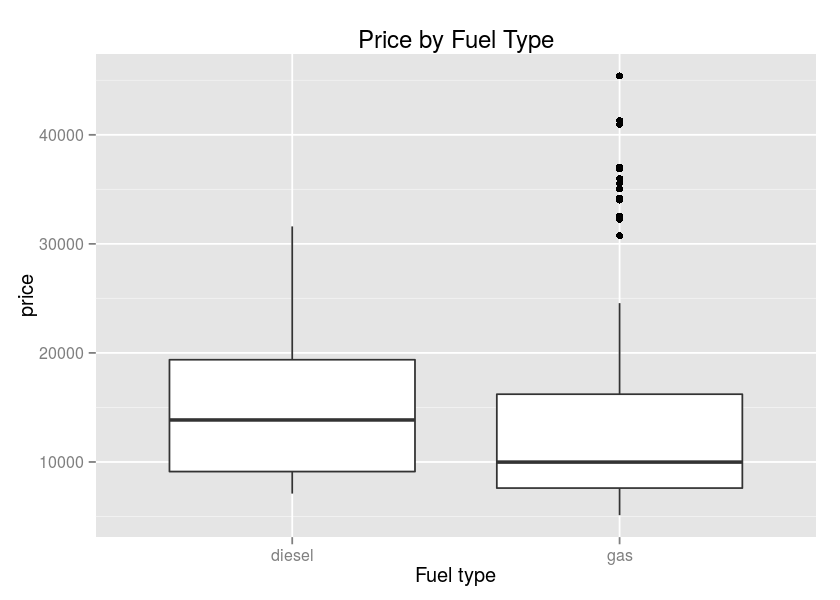

In [57]:
ggplot(auto.price, aes(x = factor(fuel.type), y = price)) + geom_boxplot() + 
    xlab('Fuel type') + ggtitle('Price by Fuel Type')

Examine these box plots and note the following:

- The median price of gas autos is less than the the median price for diesel autos.
- There is considerable overlap between the interquartile ranges of the price distributions of gas and diesel autos. 

### Kernel density estimation plots

We have looked at two methods for visualizing distributions. Now, we will look at another method, kernel density estimation. Kernel density estimation uses a moving denisty kernel to average the density of the distribution. Execute the code in the cell below to compute and plot a kernel density estimate of auto price. 

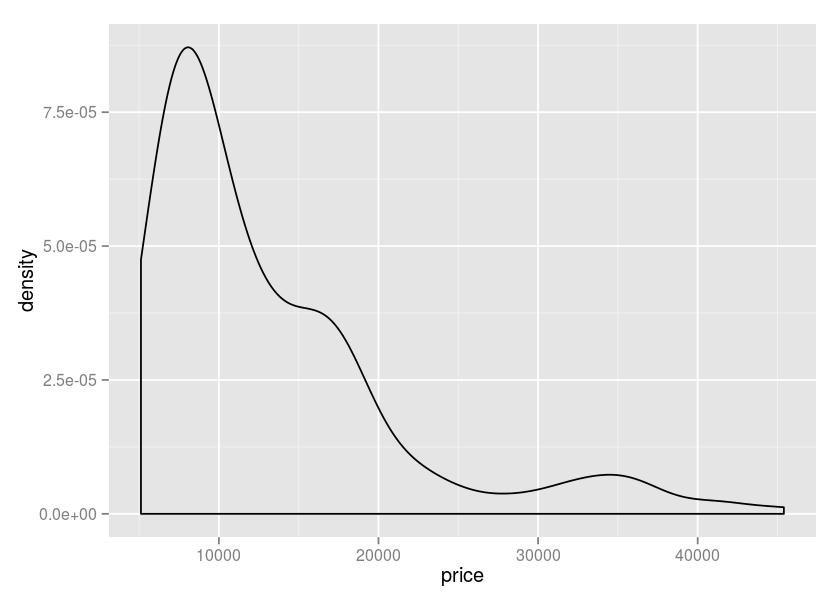

In [58]:
ggplot(auto.price, aes(price)) + geom_density()

The 

The bandwidth or span of the density kernel estimator can be adjusted to enhance or further smooth the density estimation. The `adjust` argument can be used to change the bandwidth of the density kernel, as shown in the code below. 

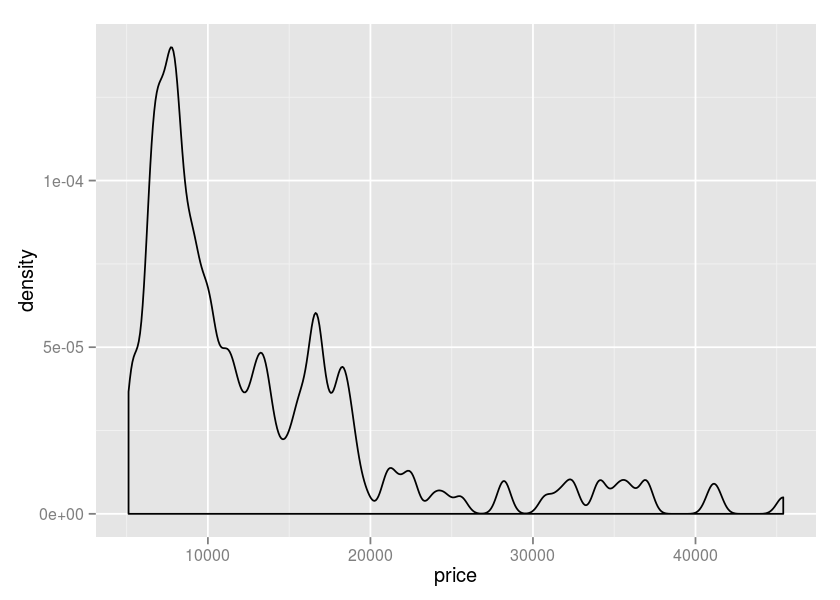

In [59]:
ggplot(auto.price, aes(price)) + geom_density(adjust = 1/5)

Notice the greater detail shown in the density plot with shorter kernel bandwidth. However, it is always possible that the detail is mostly noise. 

### Violin plots

Violine plots are a useful, and relatively new, plot type. The violin plot combines some attributes of a kernal density plot and the box plot. The violin plot shows a pair of symetric kenel desity plot. Like a box plot, the violin plot can be conditioned on a categorical (factor) variable. 

The code in the cell below creates a violin plot of auto price, grouped by fuel type. Some attributes have been added to show quantiles with the `draw_quantiles` attribute. Additionally, the `trim` attribute adds wiskers to show outliers.  

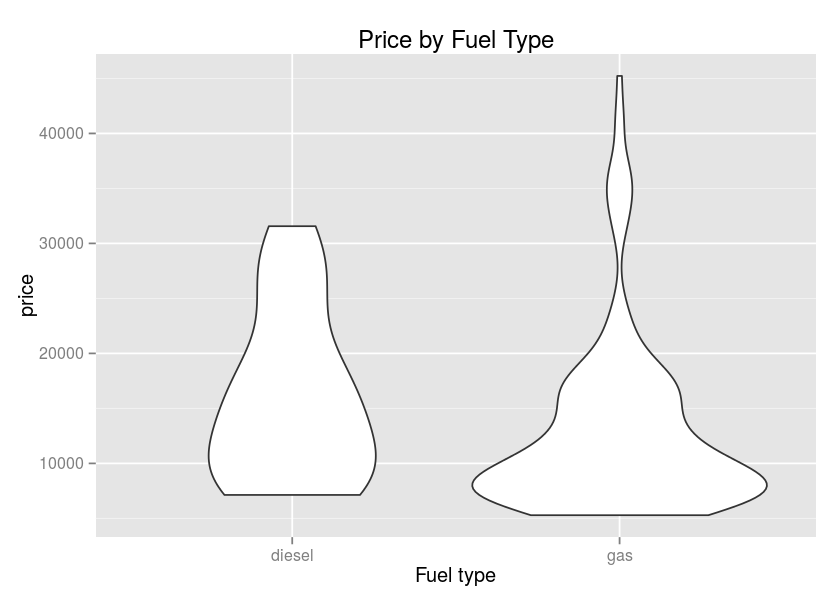

In [66]:
ggplot(auto.price, aes(x = factor(fuel.type), y = price)) + 
    geom_violin(trim = TRUE, draw_quantiles = c(0.25, 0.5, 0.75)) +
    xlab('Fuel type')  + ggtitle('Price by Fuel Type')

The violin plot shows much the same information as the box plots you created earlier. However, the violin plot shows some additional detail of the distributions. 

## Scatter plots

A basic scatter plot shows the relationship between two variables. Points are ploted at the x-y coordinates of each value pair. 

The code in the cell below creates a scatter plot of city MPG on the horizontal axis vs. auto price on the vertical axis. 

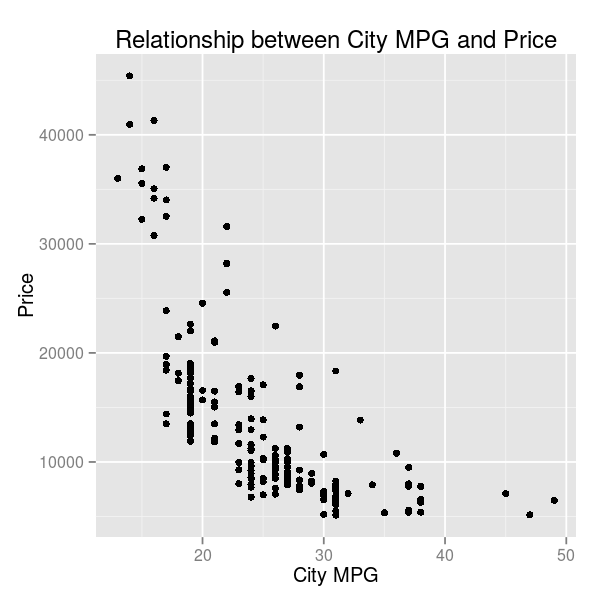

In [67]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(auto.price, aes(city.mpg, price)) + geom_point() + 
    xlab('City MPG') + ylab('Price') + 
    ggtitle('Relationship between City MPG and Price')

The scatter plot shows the relationship between price and city MPG. The relationship is rather complex, with several regions, which seem isolated from one another. 

### 2D kernel density plot

A 2 dimensional kernel density plot works much like the 1 dimensional version we have already explored. A useful application is to overlay the 2D kernel density plot on a scatter plot as shown in the code below.

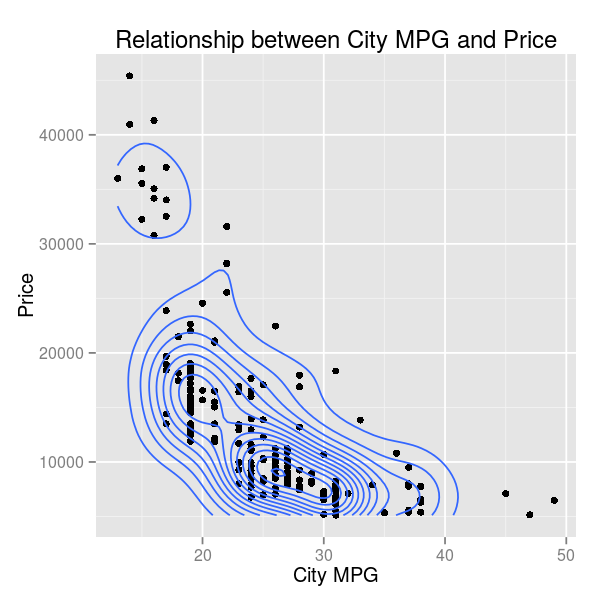

In [68]:
ggplot(auto.price, aes(city.mpg, price)) + geom_point() + 
    geom_density2d() +
    xlab('City MPG') + ylab('Price') +
    ggtitle('Relationship between City MPG and Price')

The 2D kernel density estimate is shown using contours in this case. Other options are available. 

The 2D kernel density plot highlights the fact that the relationship betwen city MPG and price has multin.ple clusters of concentration. The groups of outliers are even more promenent than before. 

Examine this plot noticing the following:

- There are a large number of autos with low price and fule economy of abouot 30 MPG. Some cells to the left at low price also show a concentration of autos.  
- Some outliers are clearly visible in the lower right and upper left. Some of these cells contain only one data point. 

### Line plots

Line plots are used to show the relationship between variables with ordered values. For example, line plots are used for time series data.

As a first step, we will create a pair of variables with ordered values.

In [69]:
x = seq(1, 100, length.out = 100)
df = data.frame(x = x, y = x^2)

Now that we have an ordered pair of variables 

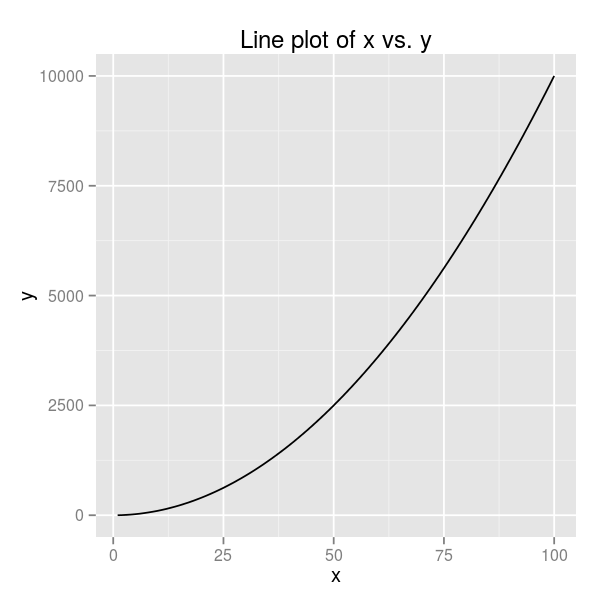

In [70]:
ggplot(df, aes(x, y)) + geom_line() + ggtitle('Line plot of x vs. y')

## Viewing multiple dimensions with aesthetics

We have now explored some basic plot types. All the plots we have created so far are projected onto a two dimensional surface. Thus, we have been limited to visualization of only two dimensions of our data set. 

Now, we will use plot aesthetics to view additional dimensions of the data set. Specific aesthetics are used to project additonal dimensions onto a two dimensional plot surface. Additionally, carefull choice of plot aesthetics can highlight certain aspects of a data set you wish to present.   

There are many possible aesthetics one can use for visualization. Specific examples we will work with here include:

- Color
- Transparency
- Size
- Marker shape
- Aesthetics specific to plot type

Using aesthetics with a bit of cleverness can lead to interesting insights about a data set. Don't over do it! Too many colors, shapes and sizes can be confusing, obfuscating rather than enlightening. 

### Color

Color can be used to view an additional dimension on a scatter plot. A categorical factor can be shown using different colors for the different categories. 

*****
**Caution!** Make sure you use choose a palette with distinctive colors for each cateogry. Too many categories using similar colors are invariably hard to see and imposible to interpret. 
****

The code in the cell below uses the ``color`` argument in `aes` with a factor of fuel.type. 

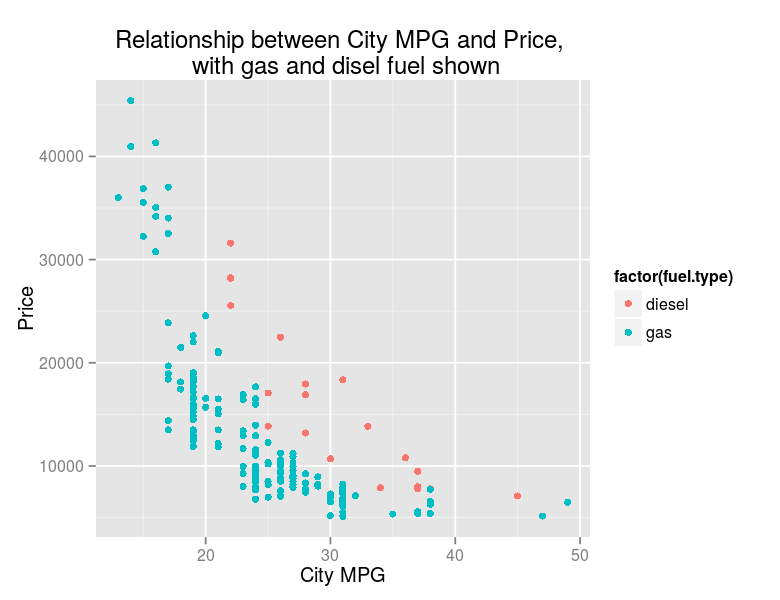

In [71]:
options(repr.plot.width=6.5, repr.plot.height=5)
ggplot(auto.price, aes(city.mpg, price)) + geom_point(aes(color = factor(fuel.type))) + 
    xlab('City MPG') + ylab('Price') + 
    ggtitle('Relationship between City MPG and Price, \n with gas and disel fuel shown')

We can now see the seperation between the gas and disel autos. In the above plot we can see that a diesel car is generally more costly at a given fuel efficiency. We can also see that all of the least efficient and most expensive cars have gas engines.

### Transparency

In the scatter plot above, notice there are areas on the plot with dense clusters of points. In particular, there are overlapping points for gas cars with city mpg between 19 and 31 (mpg is apparently reported in integer units). 

Because of the 'over-plotting' effect is hard to see just how many cars are represented in some regions of the plot. Transparency, is a useful aesthetic to overcome over-plotting. Transparency is defined on a scale from 0 (completely transparent, or invisible) to 1 (perfectly opaque). By choosing reasonable transparency values, you can get a feel for how many points are clustered in a small area of a plot. 

The code in the cell below follows the aforementioned recipe. A transparency argument, ``alpha``, has been added to the `geom_point` function.

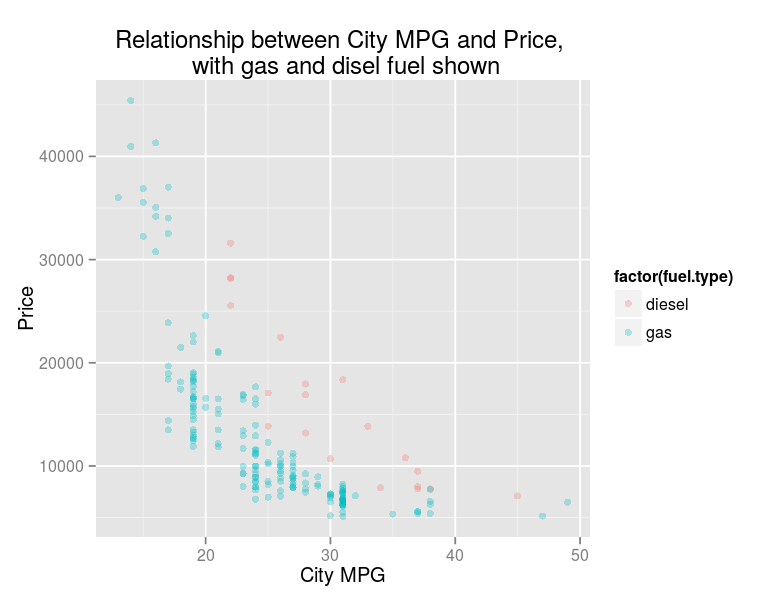

In [72]:
ggplot(auto.price, aes(city.mpg, price)) + geom_point(aes(color = factor(fuel.type)), alpha = 0.3) + 
    xlab('City MPG') + ylab('Price') + 
    ggtitle('Relationship between City MPG and Price, \n with gas and disel fuel shown')

With the transparency set to 0.3, you can now better see the density of autos in areas of the plot with significant overplotting. Notice, how changing this aesthetic changes your view of the distributon of data on the city mpg versus price projection. Most gas cars are clustered in a farily small range of price and fuel efficiency.

### Marker size

Another aesthetic which can project an additional dimension onto a two dimensional plot is marker size. The code in the cell below uses the scaled size of the marker to indicate engine size. 

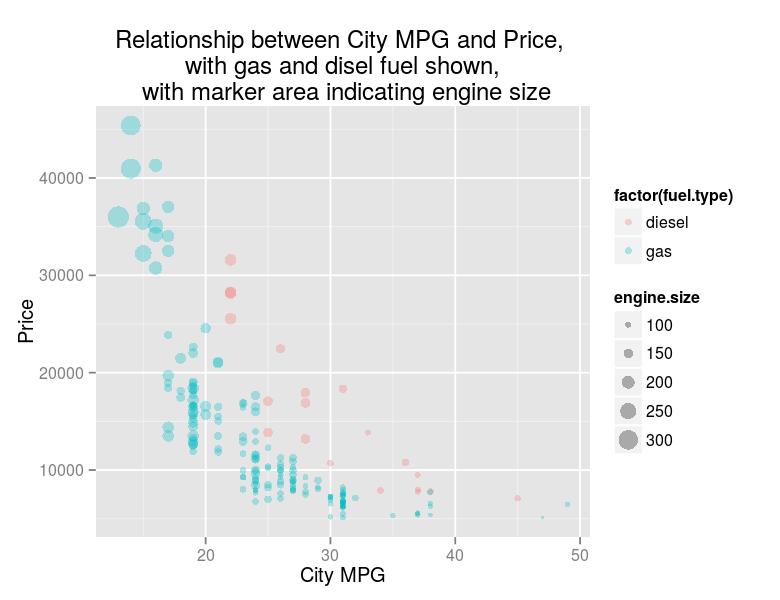

In [73]:
ggplot(auto.price, aes(city.mpg, price)) + geom_point(aes(color = factor(fuel.type), size = engine.size), alpha = 0.3) + 
    xlab('City MPG') + ylab('Price') + 
    ggtitle('Relationship between City MPG and Price, \n with gas and disel fuel shown, \n with marker area indicating engine size')

Examine the above plot noticing the different marker sizes. With larger markers, setting transparency is more necessary than ever. 

You may notice that the difference in engine size is not always apparent in the above plot. Using marker size can be a bit tricky. Another option is to use the square of the value being projected to determine marker size. The area of the marker is then proportional to the value of interest, rather than the less noticeable marker diameter. 

The code in the cell below use the square of engine size to determine marker size.  

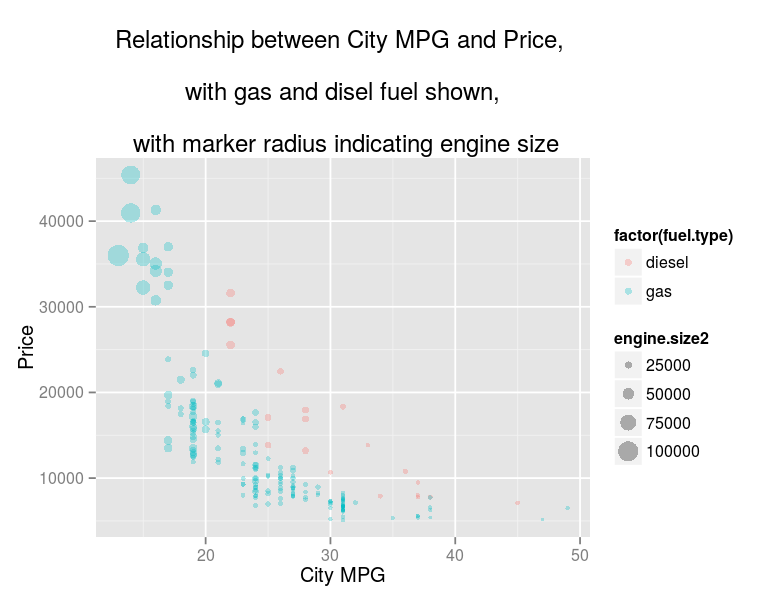

In [74]:
auto.price$engine.size2 = auto.price$engine.size^2
ggplot(auto.price, aes(city.mpg, price)) + 
        geom_point(aes(color = factor(fuel.type), 
                       size = engine.size2), alpha = 0.3) + 
    xlab('City MPG') + ylab('Price') + 
    ggtitle('Relationship between City MPG and Price, 
             \n with gas and disel fuel shown, 
             \n with marker radius indicating engine size')

Examine the above plot. Notice that the differences in engine size are much more apparent when we use area to determine marker size. The fact that the most expensive and least fule efficient cars have the largest engines is now quite apparent.

### Marker shape

Marker shape can be used to project an additonal dimension onto a two dimensional plotting surface. Typically, different marker shapes are used to indicate the categories of a categorical variable. As with other aesthetics, don't over do it. Too many similar markers on a chart will only obfuscate the relationships you are trying to show. 

The code in the cell below uses different marker shapes to indicate standard and turbo aspiration cars. 

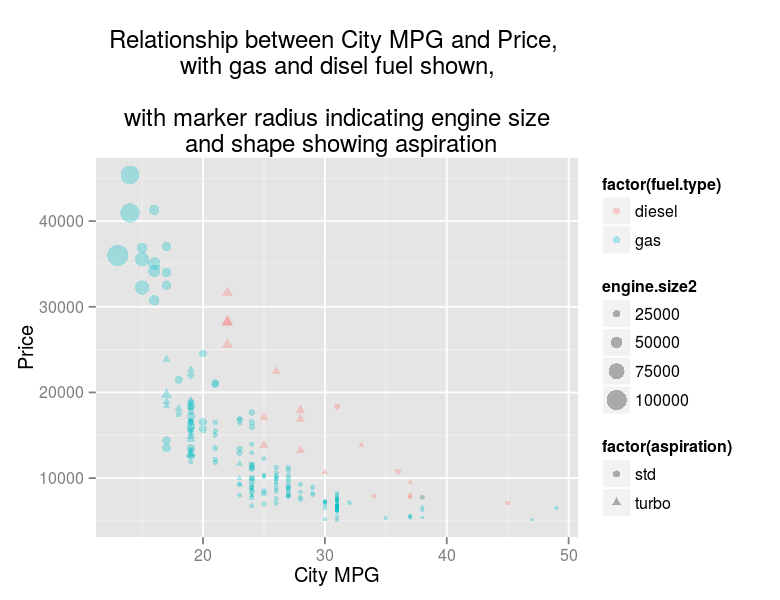

In [75]:
ggplot(auto.price, aes(city.mpg, price)) + geom_point(aes(color = factor(fuel.type), size = engine.size2, 
                                                      shape = factor(aspiration)), alpha = 0.3) + 
    xlab('City MPG') + ylab('Price') + 
    ggtitle('Relationship between City MPG and Price, \n with gas and disel fuel shown, 
              \n with marker radius indicating engine size \n and shape showing aspiration')

The above plot projects five dimensions onto the two dimensional plot surface: price, city mpg, engine size, aspiration type, and fuel type. It takes some time and effort to fully understand all of the information provided. 

Some conclusions we can draw from the chart above include:

- The most expensive cars have larger, standard aspiration, gas engines. 
- Most diesel cars use tubo aspiration and these tend to be more expensive. 
- Turbo aspiration gas engine cars are in the low range of fuel efficiency, but in the middle of the price range. 
- Some lower cost cars have large gas engines. 

## Plot specific aesthetics 

We have used some fairly general aesthetics to bring forth relationships in our dataset. We will now look at some additional aesthetics which tend to be more chart type specific. 

We have already invesigated some plot specifific asthetics:

- Using a conditioning variable with a box plot.
- Adding quantile likes to a violin plot.

### Histogram bins

As another example, we will examine the effect of changing the number of bins in a histogram. The code below plots the histogram of engine size using different numbers of bins; 20 bins and 50 bins. This is also the first time we have placed multiple sets of axes on the same figure. The first line of code defines two subplots in one row on the figure.  

The `grid.arrange` function from the `gridextra` package is used to arrage the two plots, side by side.

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)



The downloaded source packages are in
	'/tmp/Rtmpe7W0zn/downloaded_packages'


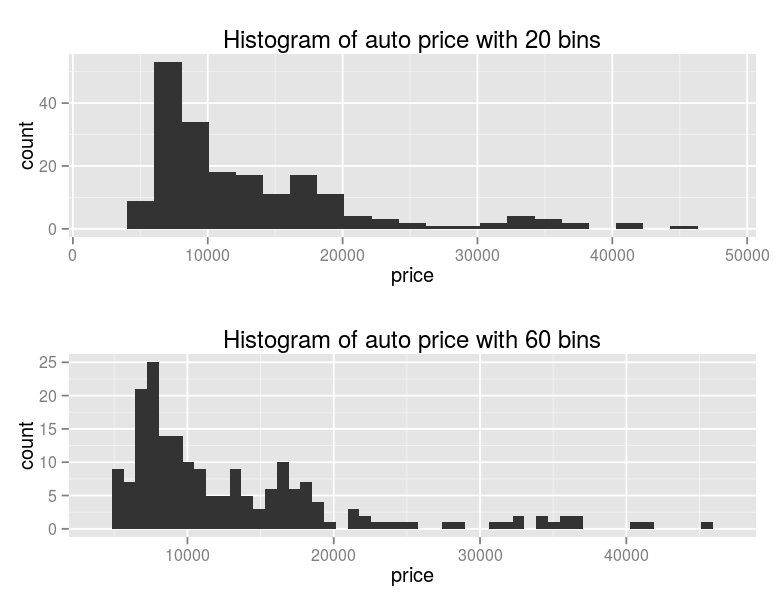

In [76]:
install.packages("gridExtra")
require(gridExtra)
bw1 = (max(auto.price$price) - min(auto.price$price))/20
bw2 = (max(auto.price$price) - min(auto.price$price))/50
require(gridExtra)
p1 = ggplot(auto.price, aes(price)) + geom_histogram(binwidth = bw1) + 
        ggtitle('Histogram of auto price with 20 bins')
p2 = ggplot(auto.price, aes(price)) + geom_histogram(binwidth = bw2) + 
        ggtitle('Histogram of auto price with 60 bins')
grid.arrange(p1, p2, nrow = 2)

Notice that the histogram with 20 bins gives a smoother result, which may be better for obtaining an overall impression of the distribution. The histogram with 50 bins shows more detail, particularly for the outliers. 

## Multi-axis and Facet Plots

We have explored basic plot types and using aesthetics to project multiple dimensions onto basic plot types. Multi-axis plots project a sub-set of dimensions of a high-dimensional data set onto the two dimensional plot surface. Displaying a sub-set of dimensions onto two dimensions projects the marginal distribution of the data onto the plot surface. 

We will investige the use of multiple plot axes and of a technique known as faceting. Multiple plot axes can be placed on the two dimensional plot surface. Faceting involves using values of categorical or numeric variables to create a systematic grid of related plots. Faceting goes by several other monikers, including conditioned plotting or lattice plotting. In effect, the faceting or conditioning projects the conditional distribution of the data set. 

We will now explore several aspects of multi-azis plots: 

- Pairwise scatter plots
- Faceted plots


### Pair wise scatter plots

Pair wise plots, also know as plot matrices, allow us to view multiple dimensions of a data set on one plot. A scatter plot is shown of each variable versus all other variables, arranged in an array. Another type of plot, such as a KDE plot, can be shown for each pair of variables. Other plot types can be placed along the diagonal of the array. Regression lines with on the plot 

R and the availble packages contain several good options for scatter plot matrices The code to create a pair wise scatter plot for certain variables in the auto price data set is shown in the cell below. The recipe is:

- Use the scatterplotMatrix function from the car package.
- Use the formula notation to define the columns you wish to plot. The fomula is defined:
$$\sim var1 + var2 + \ldots$$
- Spcify the data frame. 

The scatter plot matrix contains a number of elements which are useful for understanding the relationships in the data sets. 

- There are KDE plots for each variable along the diagonal of the matrix. 
- A pair of scatter plots for each variabe pair is displayed. These two scatter plots show the axes in both possible orientations.
- A linear regression line is shown in green on each scatter plot. This regression line gives an indiction of trend.
- A nonlinear regression line with confidence intervals is shown in red. The nonlinear regression line can highlight more complex relationships in the data set. The confidince intervals give some indication of the likely range of regression lines, given the uncertainty in the data.  

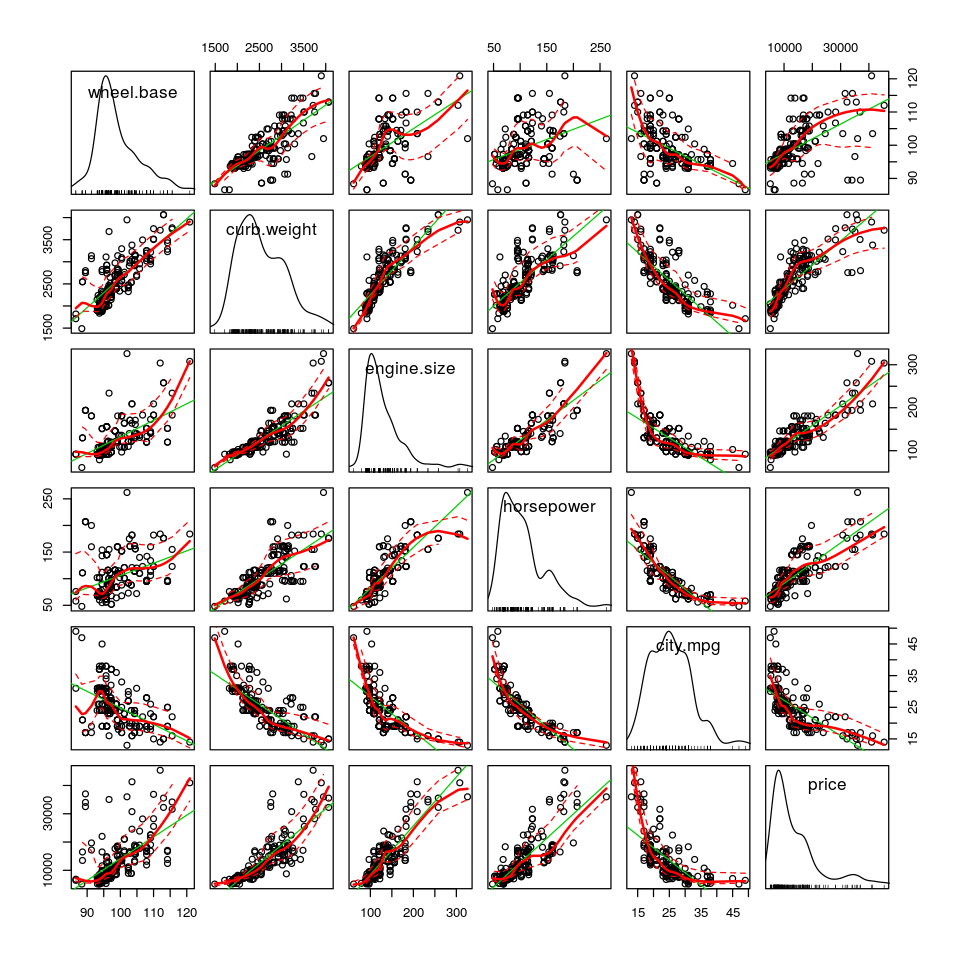

In [77]:
options(repr.plot.width=8, repr.plot.height=8)
require(car)
scatterplotMatrix(~ wheel.base + curb.weight + engine.size + horsepower + city.mpg + price, data = auto.price)

There is a great deal of information on the above plot. Examine this plot, noticing at least the following:

- The KDE plots of the variables generally show a skew to the left, or lowere values.
- Several of the variabes have a fairly linear relationship. For example, the relationships between wheel base, curb weight and engine size.
- Other relationships are clearly nonliner. For example, the relationships between price and city MPG and city MPG nd housepower. 
- Other relationships are less clear cut. For example, the relationship between price and horsepower. 

### Facet plots

We have explored using plot asthetics to project additional dimensions onto the two dimensional plot surface. We have also used scatter plot matrices to examine the relationships in several variables Now, we will look at using facet plots or conditioned plots. 

A faceted or conditioned plot is comprised of a set of sub-plots defined by one or more conditioning variables. The data in each sub-plot are sub-setted based on the values of the conditioning variable. This conditioning operation is analogous to a **group-by** opertion. 

The ggplot2 package contains the `facet_grid` function which is used to define the grid on which the sub-plots are created. The facet grid function uses an R formula object to define the rows and columns to specify the conditioning variable used to define the rows and columns. The general form of this formula is:

$$RowVariables \sim ColumnVariables$$

A conditioned plot with a single column, but multiple rows, is therefore defined:

$$RowVariables \sim\ .$$

Or, conditioned plot with a single row, but multiple columns, is defined:

$$.\ \sim ColumnVariables$$

You can use multiple variables to condition rows and columns, using the $+$ symbol as the deliminator:

$$RowVar1 + RowVar2 + \ldots \sim ColVar1 + ColVar2 + \ldots$$

Like all good things in visulation, there are practical limits. Creating a large grid of sub-plots using multiple conditioning variables quickly becomes confussing to look at. 

Let's give this a try. The code below creates a single row of histograms conditioned on the type of drive wheels of the auto:

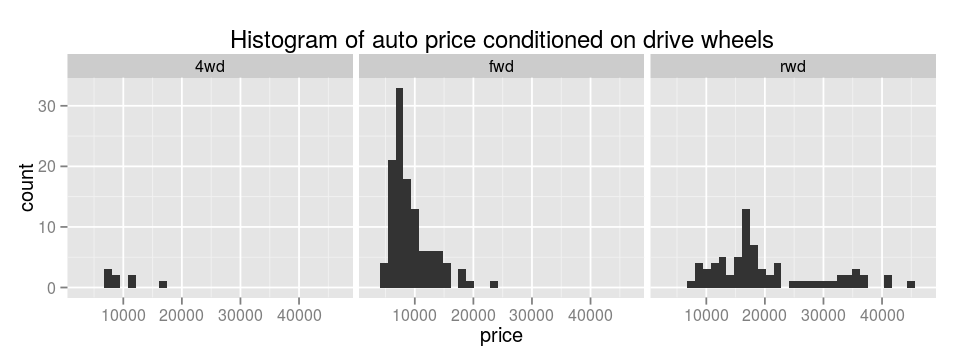

In [78]:
options(repr.plot.width=8, repr.plot.height=3)
bw1 = (max(auto.price$price) - min(auto.price$price))/30
ggplot(auto.price, aes(price)) + 
        geom_histogram(binwidth = bw1) + 
        facet_grid(. ~ drive.wheels) +
        ggtitle('Histogram of auto price conditioned on drive wheels')

The three histograms are displayed in the grid; one for each value of the conditioning variable, drive wheels. The shingles at the top of each plot display the value of the conditioning variable. 

From these plots we can see that the price of the 4wd cars overlaps the fwd cars, and the rwd cars have a greater range of prices. 

Let's try another example In this case, we will use two conditioning variables, fuel type and aspiration to create a two dimensional grid. Fule type conditions the rows. Aspiration conditions the  columns.

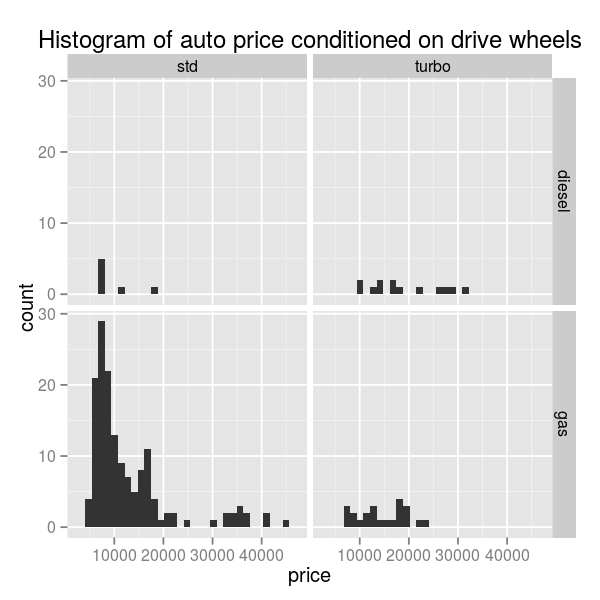

In [79]:
options(repr.plot.width=5, repr.plot.height=5)
bw1 = (max(auto.price$price) - min(auto.price$price))/30
ggplot(auto.price, aes(price)) + 
        geom_histogram(binwidth = bw1) + 
        facet_grid(fuel.type ~ aspiration) +
        ggtitle('Histogram of auto price conditioned on drive wheels')

You can see the two dimensional grid of the conditioned histograms. The tiles on the top show the value of the aspiration. The tiles to the right show the values of the fuel type. The combination of aspiration and fuel type define the conditioning grid. 

Examine this grid of plots and note the diffences by facet variable pair.

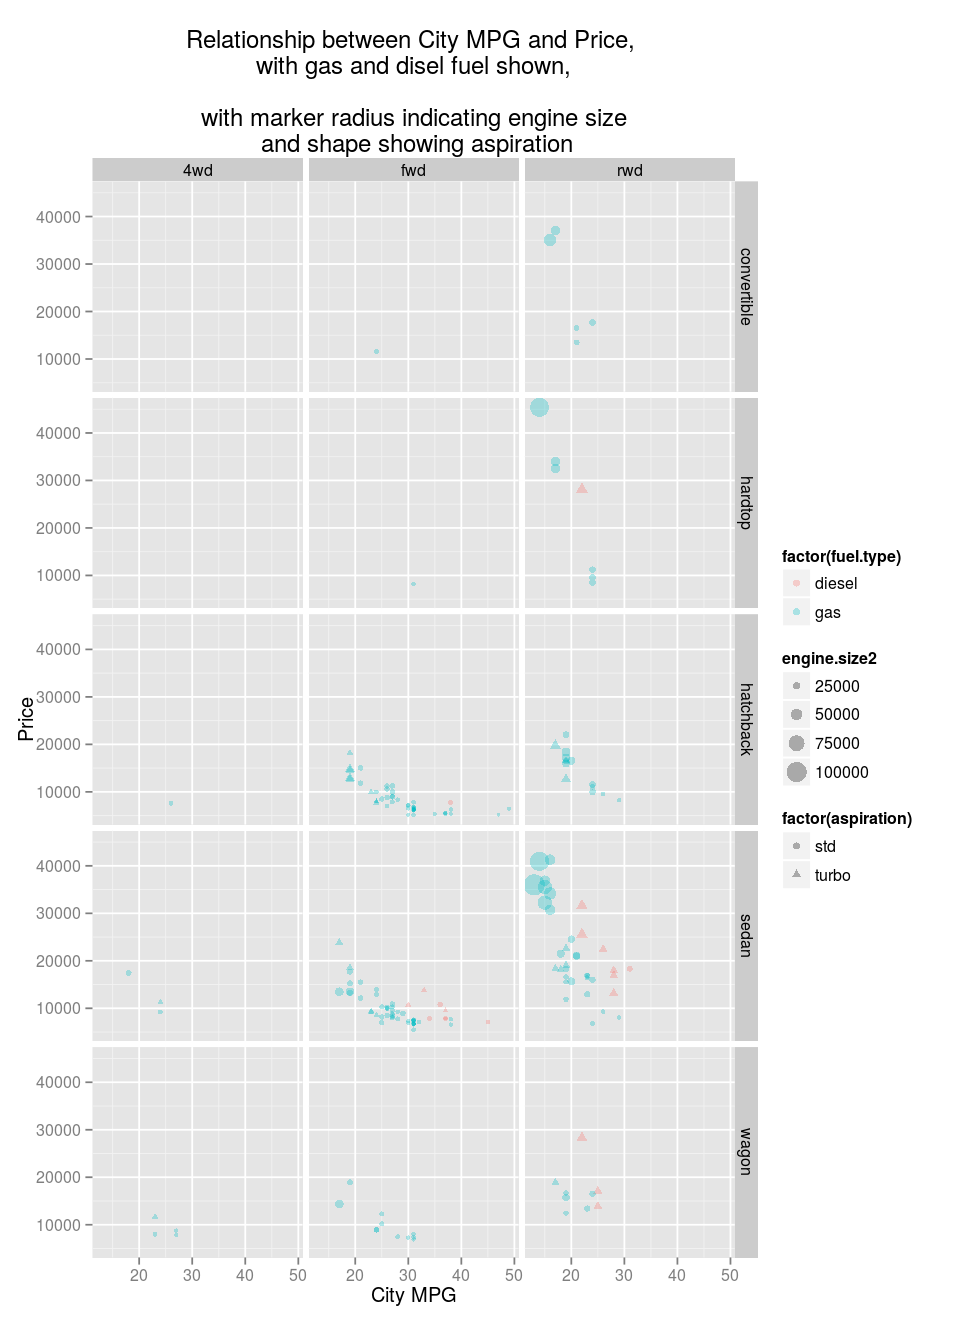

In [80]:
options(repr.plot.width=8, repr.plot.height=11)
ggplot(auto.price, aes(city.mpg, price)) + geom_point(aes(color = factor(fuel.type), size = engine.size2, 
                                                      shape = factor(aspiration)), alpha = 0.3) + 
    facet_grid(body.style ~ drive.wheels) +
    xlab('City MPG') + ylab('Price') + 
    ggtitle('Relationship between City MPG and Price, \n with gas and disel fuel shown, 
              \n with marker radius indicating engine size \n and shape showing aspiration')

**Your Turn** Modify the plot above to add the number of doors as a faceting variable on the vertical axis.

## Summary

We have covered a lot of ground in this tutorial. We have learned quite a bit about the relationships in the auto price data set by creating multiple views to visualize these data. 

Specifically, in this tutoral we have:

- Examined the uses of and methods for creation of several basic plot types.
- Used plot aesthetics to project additional dimensions onto a two dimensional plot surface, or to highlight aspects of the relationships in the data.
- Used multi-axis and faceted plots to project additional dimensions onto the two dimensional plot surface. 

Finally, **have fun exploring your data!**